Инициализация библиотек

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import pandas_datareader.data as web

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima_model import ARMAResults,ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.stattools import adfuller


from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy import stats
from scipy.stats import normaltest
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

Загрузка и анализ датасета

1. Датасет

In [21]:
url = 'https://drive.google.com/file/d/1AbUl7tP_J47ST7L7kc3wxENxmpBUsumS/view'

In [22]:
parts = urlparse(url)
parts

ParseResult(scheme='https', netloc='drive.google.com', path='/file/d/1AbUl7tP_J47ST7L7kc3wxENxmpBUsumS/view', params='', query='', fragment='')

In [23]:
url = 'https://drive.google.com/file/d/1AbUl7tP_J47ST7L7kc3wxENxmpBUsumS/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [24]:
dataset1 = pd.read_csv(url, index_col="Month", parse_dates= True)

In [25]:
dataset1.head()

,Unnamed: 0,Monthly milk production (pounds per cow)
Month,,
1962-01-01,0,589
1962-02-01,1,561
1962-03-01,2,640
1962-04-01,3,656
1962-05-01,4,727


In [27]:
dataset1 = dataset1.drop(columns=['Unnamed: 0'])

In [28]:
dataset1.head()

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
2. Датасет

In [56]:
url = 'https://drive.google.com/file/d/1wMwd2mV_nchXgaz3QTPSBl7Xd-ITsPVQ/view'

In [57]:
parts = urlparse(url)
parts

ParseResult(scheme='https', netloc='drive.google.com', path='/file/d/1wMwd2mV_nchXgaz3QTPSBl7Xd-ITsPVQ/view', params='', query='', fragment='')

In [58]:
url = 'https://drive.google.com/file/d/1wMwd2mV_nchXgaz3QTPSBl7Xd-ITsPVQ/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [59]:
dataset2 = pd.read_csv(url, index_col="date", parse_dates= True)

In [60]:
dataset2.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


3. Датасет

In [82]:
url = 'https://drive.google.com/file/d/1yfw6gcgmJXCtxkjC69ekUvsEtAiYTlST/view'

In [83]:
parts = urlparse(url)
parts

ParseResult(scheme='https', netloc='drive.google.com', path='/file/d/1yfw6gcgmJXCtxkjC69ekUvsEtAiYTlST/view', params='', query='', fragment='')

In [84]:
url = 'https://drive.google.com/file/d/1yfw6gcgmJXCtxkjC69ekUvsEtAiYTlST/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [85]:
dataset3 = pd.read_csv(url, index_col="Month", parse_dates= True)

In [86]:
dataset3.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Проанализируем первый датасет

In [29]:
dataset1.isna().sum()

Monthly milk production (pounds per cow)    0
dtype: int64

In [30]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Monthly milk production (pounds per cow)  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [34]:
len(dataset1)

168

In [38]:
# создаем индекс (уникальность) по полю дата
dataset1.index= pd.to_datetime(dataset1.index)

In [39]:
dataset1.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [41]:
dataset1.describe()

,Monthly milk production (pounds per cow)
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [42]:
dataset1.columns

Index(['Monthly milk production (pounds per cow)'], dtype='object')

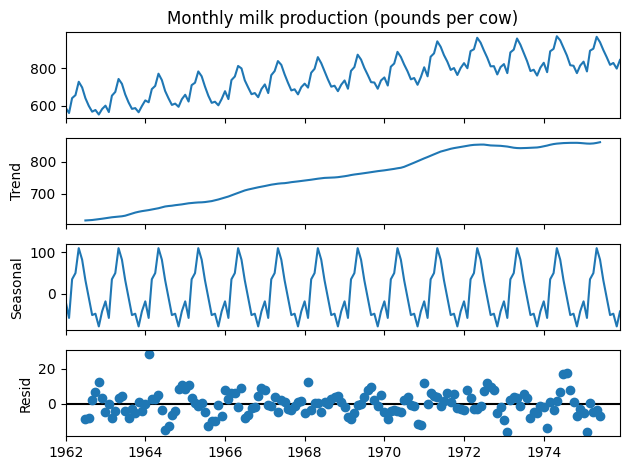

In [44]:
# сезонная декомпозиция
ssn= seasonal_decompose(dataset1["Monthly milk production (pounds per cow)"], model="add")
ssn.plot();

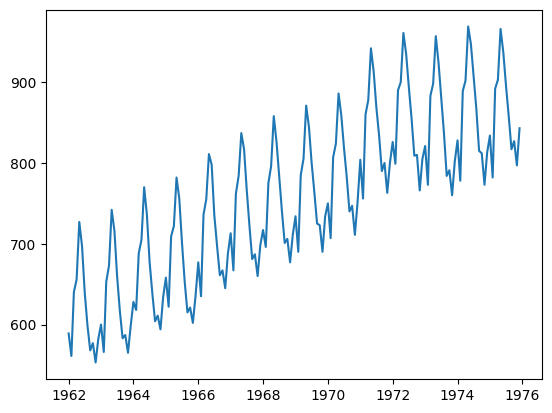

In [31]:
plt.plot(dataset1)
plt.show()

In [46]:
# разделим на тестовый и тренировочный набор данных
train= dataset1.iloc[:len(dataset1)-12]
test= dataset1.iloc[len(dataset1)-12:]

/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30881D+00    |proj g|=  1.79335D-03

At iterate    5    f=  3.30860D+00    |proj g|=  2.23332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     12      1     0     0   4.832D-07   3.309D+00
  F =   3.3085742976023185     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RMSE= 14.037110481824282 

MSE= 197.04047067894112


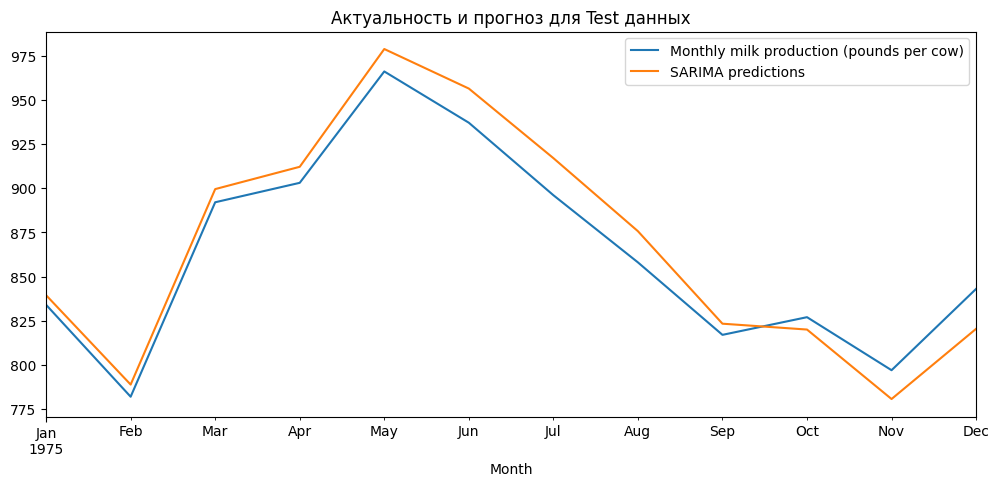

In [47]:
# обучим модель
sarima_model= SARIMAX(train["Monthly milk production (pounds per cow)"], order= (3,0,0), seasonal_order= (0,1,0,12))
sarima_model_fit= sarima_model.fit()

# сделаем пронозы на Test данных
start= len(train)
end= len(train) + len(test) -1
pred= sarima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("SARIMA predictions")

# построим прогноз
title= "Актуальность и прогноз для Test данных"
test["Monthly milk production (pounds per cow)"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse= mean_squared_error(test["Monthly milk production (pounds per cow)"],pred)
rmse_sarima= rmse(test["Monthly milk production (pounds per cow)"], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")

In [48]:
# подсчитаем сезонный индекс
result_mul = seasonal_decompose(train["Monthly milk production (pounds per cow)"],   # 3 years
                                model='multiplicative',
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# соединим его с Train данными
train['month'] = train.index.month
train2 = pd.merge(train, seasonal_index, how='left', on='month')
train2.index = train.index  # переопределим первичный индекс


# соединим его с Test данными
test['month'] = test.index.month
test2 = pd.merge(test, seasonal_index, how='left', on='month')
test2.index = test.index  # переопределим первичный индекс

/tmp/ipykernel_3848/3430713077.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month
/tmp/ipykernel_3848/3430713077.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month'] = test.index.month


In [49]:
sxmodel = auto_arima(train2["Monthly milk production (pounds per cow)"],
                     exogenous=train2[['seasonal']],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=None,
                    D=None,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1203.992, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1039.187, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1006.896, Time=0.91 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1001.453, Time=1.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1001.195, Time=0.38 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=999.197, Time=0.23 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1001.194, Time=0.88 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=10.36 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=994.889, Time=0.59 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=1035.695, Time=0.12 sec
 ARIMA(2,0,0)(1,1,1)[12] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -490.431
Date:                            Tue, 22 Aug 2023   AIC                            994.862
Time:                                    01:57:48   BIC                           1015.650
Sample:                                01-01-1962   HQIC                          1003.309
                                     - 12-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3091      2.038      1.623      0.105      -0.686       7.304
ar.L1         -0.2335      0.096     -2.430      0.015      -0.422      -0.045
ar.L2          0.8181      0.077     10.610      0.000       0.667       0.969
ar.L3          0.2510      0.096      2.619      0.009       0.063       0.439
ma.L1          0.9588      0.071     13.598      0.000       0.821       1.097
ma.S.L12      -0.6026      0.087     -6.948      0.000      -0.773      -0.433
sigma2        50.4393      5.268      9.575      0.000      40.115      60.764
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                50.07
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.84
Prob(H) (two-sided):                  0.34   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36881D+00    |proj g|=  1.90517D-02

At iterate    5    f=  3.36673D+00    |proj g|=  8.82940D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   9.091D-06   3.367D+00
  F =   3.3667276134212423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Square is 11.778076850540975 

Mean Square Error is 138.72309429724922


/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


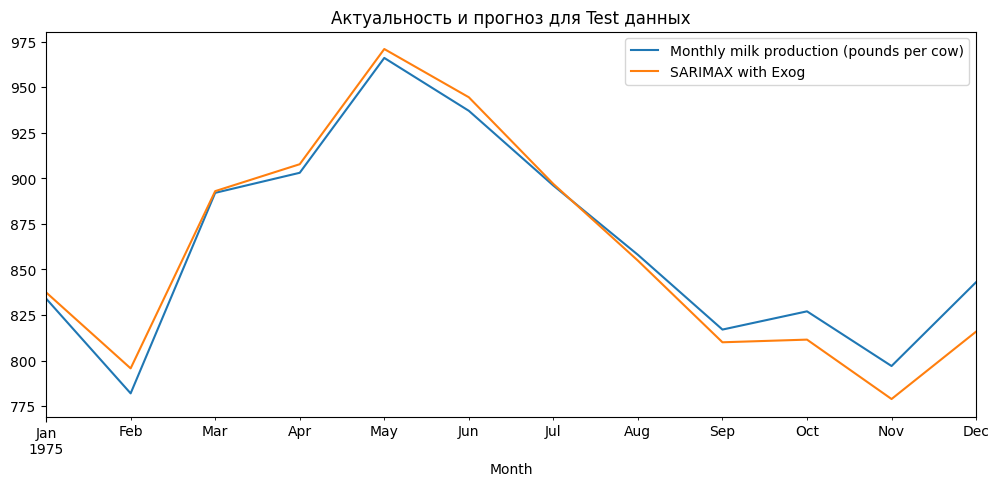

In [50]:
# обучение модели
sarimax_model= SARIMAX(train2["Monthly milk production (pounds per cow)"], order= (1,1,0), seasonal_order= (1,0,0,12),exog=train2[['seasonal']])
sarimax_model_fit= sarimax_model.fit()

# прогнозы на Test
start= len(train)
end= len(train) + len(test) -1
pred= sarimax_model_fit.predict(start=start, end=end, dynamic=False, typ="levels",exog=test2[['seasonal']]).rename("SARIMAX with Exog")

title= "Актуальность и прогноз для Test данных"
test["Monthly milk production (pounds per cow)"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценка модели
mse= mean_squared_error(test["Monthly milk production (pounds per cow)"],pred)
rmse_sarimax= rmse(test["Monthly milk production (pounds per cow)"], pred)

print(f"Root Mean Square is {rmse_sarimax} \n")
print(f"Mean Square Error is {mse}")

In [53]:
# перетренируем модель на всем объеме данных для прогноза
model= SARIMAX(dataset1["Monthly milk production (pounds per cow)"], order= (3,0,0), seasonal_order= (0,1,0,12))
results= model.fit()

start= len(dataset1)
end= len(dataset1) + len(test) -1

pred= results.predict(start=start, end=end, dynamic=False, typ="levels").rename("Future Forecasts")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32309D+00    |proj g|=  1.74322D-03

At iterate    5    f=  3.32291D+00    |proj g|=  7.16458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   9.418D-07   3.323D+00
  F =   3.3228896551008908     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Актуальность и прогноз для Test данных'}, xlabel='Month'>

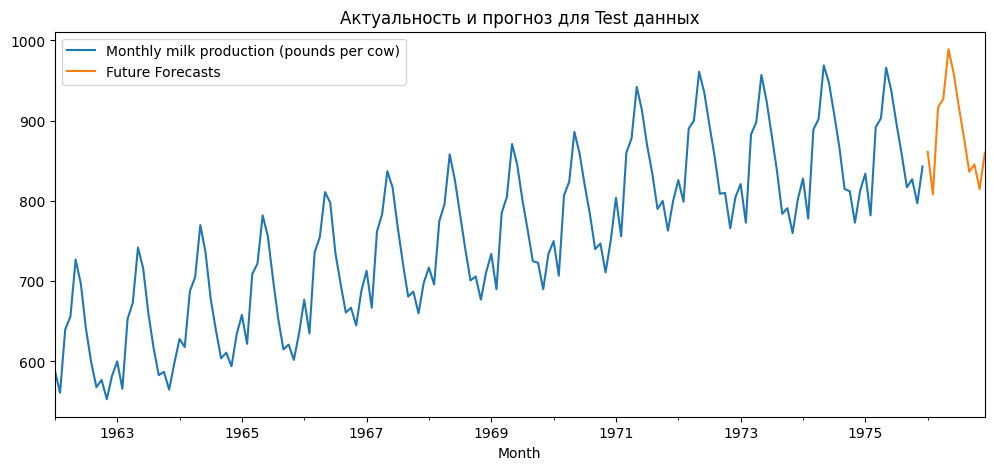

In [54]:
# прогноз
dataset1["Monthly milk production (pounds per cow)"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

In [62]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 1978-01-01 to 1991-03-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   people_employed  159 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [63]:
len(dataset2)

159

In [65]:
# создаем индекс (уникальность) по полю дата
dataset2.index= pd.to_datetime(dataset2.index)

In [66]:
dataset2.index

DatetimeIndex(['1978-01-01', '1978-02-01', '1978-03-01', '1978-04-01',
               '1978-05-01', '1978-06-01', '1978-07-01', '1978-08-01',
               '1978-09-01', '1978-10-01',
               ...
               '1990-06-01', '1990-07-01', '1990-08-01', '1990-09-01',
               '1990-10-01', '1990-11-01', '1990-12-01', '1991-01-01',
               '1991-02-01', '1991-03-01'],
              dtype='datetime64[ns]', name='date', length=159, freq=None)

In [67]:
dataset2.describe()

,people_employed
count,159.000000
mean,6787.135849
std,604.616978
min,5971.300000
25%,6312.250000
50%,6528.700000
75%,7216.950000
max,7941.600000


In [68]:
dataset2.columns

Index(['people_employed'], dtype='object')

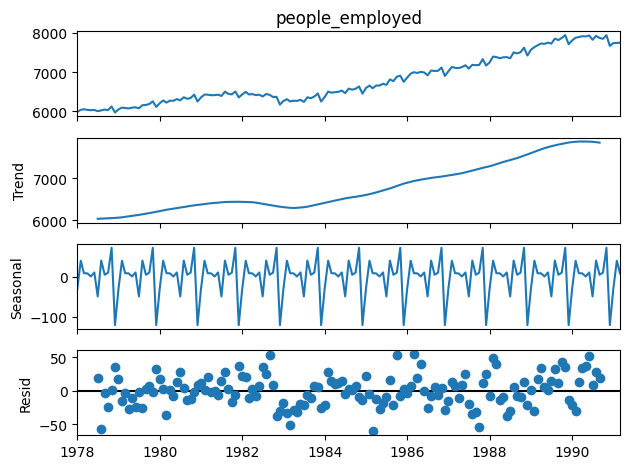

In [70]:
# сезонная декомпозиция
ssn= seasonal_decompose(dataset2['people_employed'], model="add")
ssn.plot();

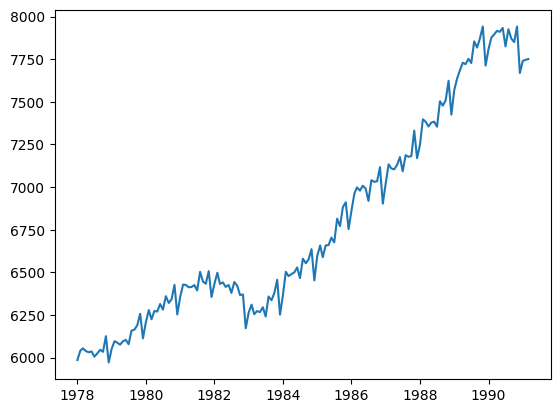

In [71]:
plt.plot(dataset2)
plt.show()

In [72]:
# разделим на тестовый и тренировочный набор данных
train= dataset2.iloc[:len(dataset2)-12]
test= dataset2.iloc[len(dataset2)-12:]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14075D+00    |proj g|=  2.54735D-01

At iterate    5    f=  4.78184D+00    |proj g|=  8.77154D-02

At iterate   10    f=  4.75532D+00    |proj g|=  1.25623D-03

At iterate   15    f=  4.75504D+00    |proj g|=  9.48664D-03

At iterate   20    f=  4.75493D+00    |proj g|=  6.90630D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   6.906D-06   4.755D+00
  F =   4.7549294244686742     

CONVERG

/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


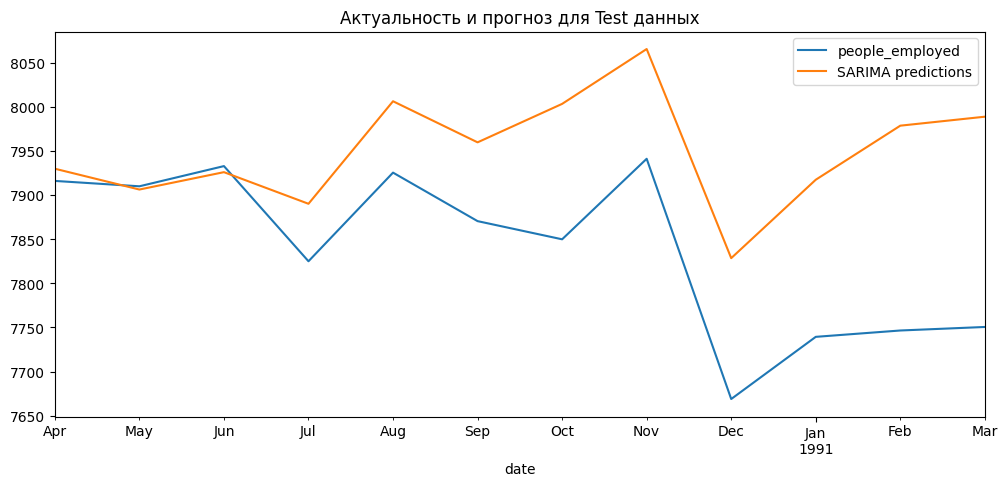

In [73]:
# обучим модель
sarima_model= SARIMAX(train['people_employed'], order= (3,0,0), seasonal_order= (0,1,0,12))
sarima_model_fit= sarima_model.fit()

# сделаем пронозы на Test данных
start= len(train)
end= len(train) + len(test) -1
pred= sarima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("SARIMA predictions")

# построим прогноз
title= "Актуальность и прогноз для Test данных"
test['people_employed'].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse= mean_squared_error(test['people_employed'],pred)
rmse_sarima= rmse(test['people_employed'], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")

In [74]:
# подсчитаем сезонный индекс
result_mul = seasonal_decompose(train['people_employed'],   # 3 years
                                model='multiplicative',
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# соединим его с Train данными
train['month'] = train.index.month
train2 = pd.merge(train, seasonal_index, how='left', on='month')
train2.index = train.index  # переопределим первичный индекс


# соединим его с Test данными
test['month'] = test.index.month
test2 = pd.merge(test, seasonal_index, how='left', on='month')
test2.index = test.index  # переопределим первичный индекс

/tmp/ipykernel_3848/4275412922.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month
/tmp/ipykernel_3848/4275412922.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month'] = test.index.month


In [75]:
sxmodel = auto_arima(train2['people_employed'],
                     exogenous=train2[['seasonal']],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=None,
                    D=None,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1615.725, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1698.275, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1494.908, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1589.529, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1700.112, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1667.292, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1456.152, Time=0.43 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1593.738, Time=0.17 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1458.067, Time=1.29 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1550.728, Time=0.83 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.09 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1459.762, Time=1.47 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  147
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -723.334
Date:                              Tue, 22 Aug 2023   AIC                           1454.669
Time:                                      02:07:01   BIC                           1466.603
Sample:                                  01-01-1978   HQIC                          1459.518
                                       - 03-01-1990                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1905      0.081     -2.358      0.018      -0.349      -0.032
ar.S.L12       0.9916      0.008    130.336      0.000       0.977       1.006
ma.S.L12      -0.7089      0.094     -7.508      0.000      -0.894      -0.524
sigma2       974.4352    106.829      9.121      0.000     765.054    1183.816
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.92   Prob(JB):                         0.24
Heteroskedasticity (H):               2.02   Skew:                             0.24
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82828D+00    |proj g|=  1.49994D-01

At iterate    5    f=  4.80501D+00    |proj g|=  2.95997D-02

At iterate   10    f=  4.80207D+00    |proj g|=  3.78292D-03

At iterate   15    f=  4.80110D+00    |proj g|=  7.13292D-03

At iterate   20    f=  4.80072D+00    |proj g|=  3.74500D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   3.745D-06   4.801D+00
  F =   4.8007184038664006     

CONVERG

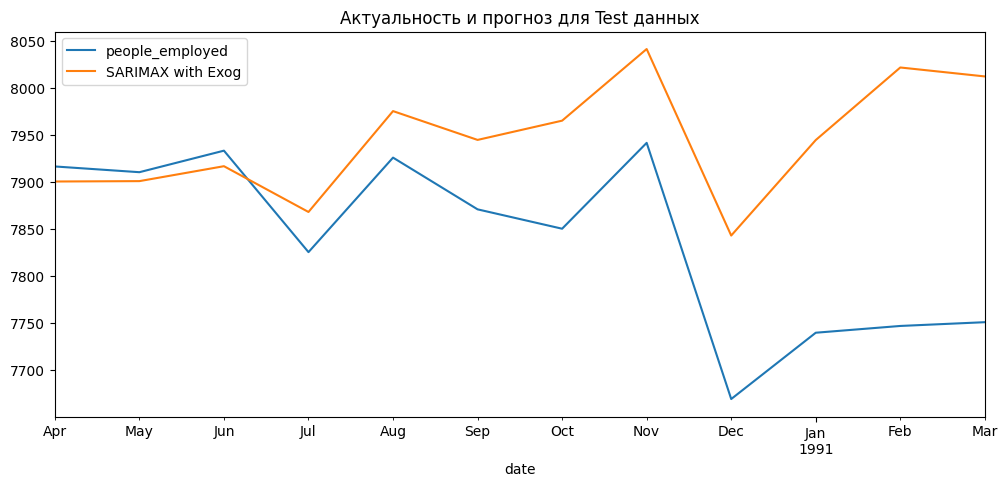

In [79]:
# обучение модели
sarimax_model= SARIMAX(train2['people_employed'], order= (1,1,0), seasonal_order= (1,0,1,12),exog=train2[['seasonal']])
sarimax_model_fit= sarimax_model.fit()

# прогнозы на Test
start= len(train)
end= len(train) + len(test) -1
pred= sarimax_model_fit.predict(start=start, end=end, dynamic=False, typ="levels",exog=test2[['seasonal']]).rename("SARIMAX with Exog")

title= "Актуальность и прогноз для Test данных"
test['people_employed'].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценка модели
mse= mean_squared_error(test['people_employed'],pred)
rmse_sarimax= rmse(test['people_employed'], pred)

print(f"Root Mean Square is {rmse_sarimax} \n")
print(f"Mean Square Error is {mse}")

In [80]:
# перетренируем модель на всем объеме данных для прогноза
model= SARIMAX(dataset2['people_employed'], order= (3,0,0), seasonal_order= (0,1,0,12))
results= model.fit()

start= len(dataset2)
end= len(dataset2) + len(test) -1

pred= results.predict(start=start, end=end, dynamic=False, typ="levels").rename("Future Forecasts")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04593D+00    |proj g|=  2.15183D-01

At iterate    5    f=  4.78972D+00    |proj g|=  4.36948D-02

At iterate   10    f=  4.78168D+00    |proj g|=  1.02681D-03

At iterate   15    f=  4.78132D+00    |proj g|=  8.17941D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   2.522D-05   4.781D+00
  F =   4.7812388604541329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Актуальность и прогноз для Test данных'}, xlabel='date'>

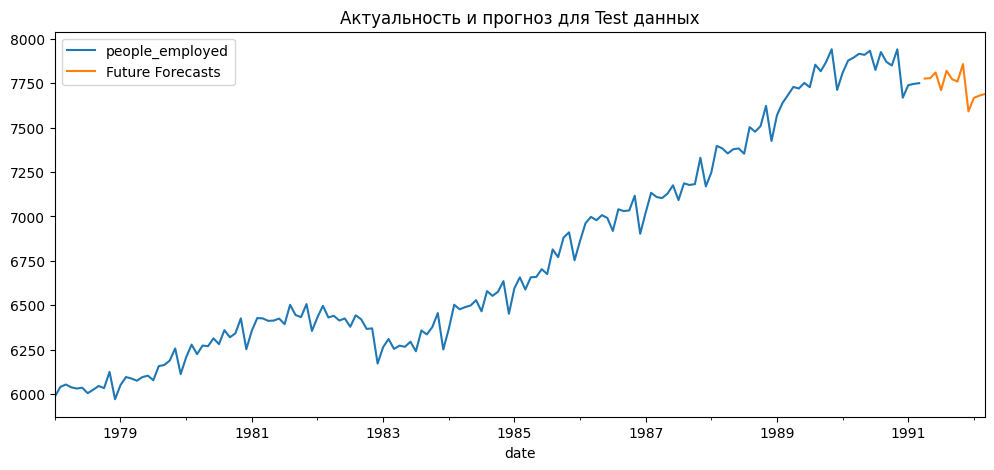

In [81]:
# прогноз
dataset2['people_employed'].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

In [87]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [88]:
len(dataset3)

144

In [89]:
# создаем индекс (уникальность) по полю дата
dataset3.index= pd.to_datetime(dataset3.index)

In [90]:
dataset3.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [91]:
dataset3.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [92]:
dataset3.columns

Index(['#Passengers'], dtype='object')

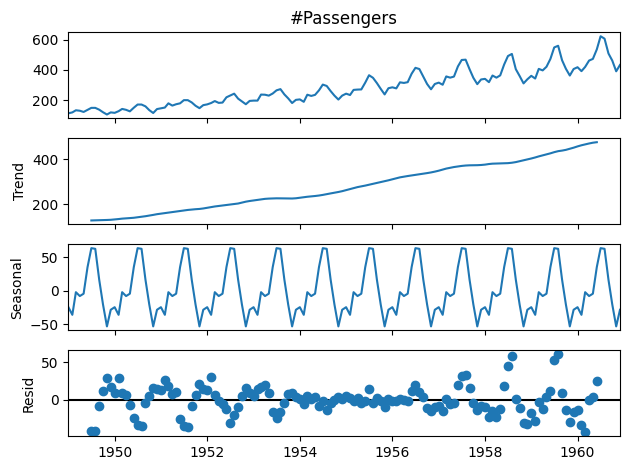

In [93]:
# сезонная декомпозиция
ssn= seasonal_decompose(dataset3['#Passengers'], model="add")
ssn.plot();

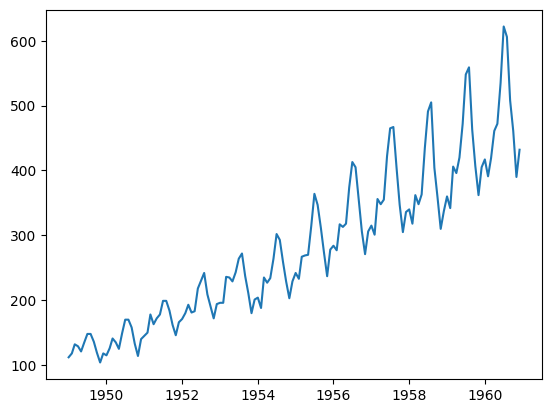

In [94]:
plt.plot(dataset3)
plt.show()

In [95]:
# разделим на тестовый и тренировочный набор данных
train= dataset3.iloc[:len(dataset3)-12]
test= dataset3.iloc[len(dataset3)-12:]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42479D+00    |proj g|=  3.63776D-03

At iterate    5    f=  3.42452D+00    |proj g|=  8.58513D-03

At iterate   10    f=  3.42417D+00    |proj g|=  9.72667D-03

At iterate   15    f=  3.42389D+00    |proj g|=  4.96869D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   4.969D-06   3.424D+00
  F =   3.4238882841124521     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RMSE= 17

/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


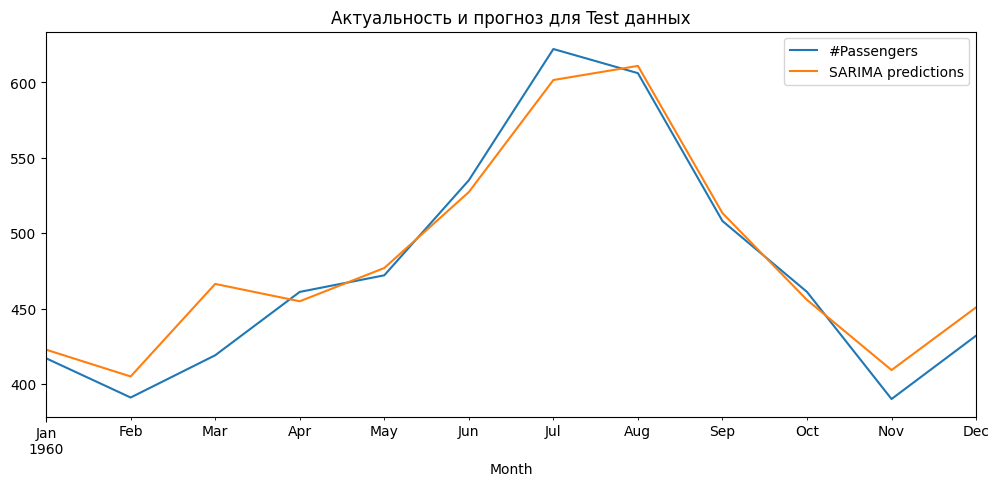

In [96]:
# обучим модель
sarima_model= SARIMAX(train['#Passengers'], order= (3,0,0), seasonal_order= (0,1,0,12))
sarima_model_fit= sarima_model.fit()

# сделаем пронозы на Test данных
start= len(train)
end= len(train) + len(test) -1
pred= sarima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("SARIMA predictions")

# построим прогноз
title= "Актуальность и прогноз для Test данных"
test['#Passengers'].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse= mean_squared_error(test['#Passengers'],pred)
rmse_sarima= rmse(test['#Passengers'], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")

In [97]:
# подсчитаем сезонный индекс
result_mul = seasonal_decompose(train['#Passengers'],   # 3 years
                                model='multiplicative',
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# соединим его с Train данными
train['month'] = train.index.month
train2 = pd.merge(train, seasonal_index, how='left', on='month')
train2.index = train.index  # переопределим первичный индекс


# соединим его с Test данными
test['month'] = test.index.month
test2 = pd.merge(test, seasonal_index, how='left', on='month')
test2.index = test.index  # переопределим первичный индекс

/tmp/ipykernel_3848/3842992799.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month
/tmp/ipykernel_3848/3842992799.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month'] = test.index.month


In [98]:
sxmodel = auto_arima(train2['#Passengers'],
                     exogenous=train2[['seasonal']],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3,
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=None,
                    D=None,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1022.029, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.82 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.22 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.38 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.36 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.08 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.27 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 22 Aug 2023   AIC                            905.686
Time:                                    02:11:08   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42479D+00    |proj g|=  3.63775D-03

At iterate    5    f=  3.42452D+00    |proj g|=  8.58518D-03

At iterate   10    f=  3.42416D+00    |proj g|=  9.72833D-03

At iterate   15    f=  3.42389D+00    |proj g|=  4.95510D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   4.955D-06   3.424D+00
  F =   3.4238882841073939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mea

/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


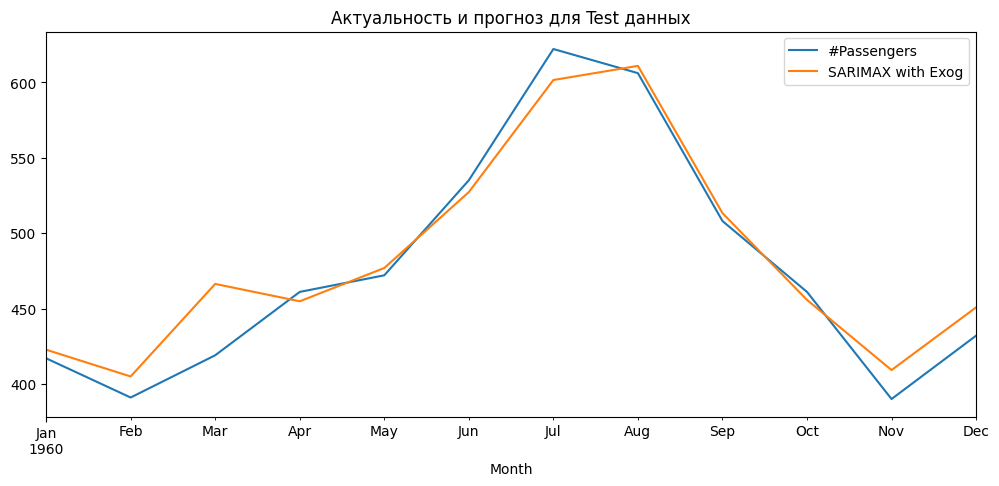

In [99]:
# обучение модели
sarimax_model= SARIMAX(train2['#Passengers'], order= (3,0,0), seasonal_order= (0,1,0,12),exog=train2[['seasonal']])
sarimax_model_fit= sarimax_model.fit()

# прогнозы на Test
start= len(train)
end= len(train) + len(test) -1
pred= sarimax_model_fit.predict(start=start, end=end, dynamic=False, typ="levels",exog=test2[['seasonal']]).rename("SARIMAX with Exog")

title= "Актуальность и прогноз для Test данных"
test['#Passengers'].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценка модели
mse= mean_squared_error(test['#Passengers'],pred)
rmse_sarimax= rmse(test['#Passengers'], pred)

print(f"Root Mean Square is {rmse_sarimax} \n")
print(f"Mean Square Error is {mse}")

In [101]:
# перетренируем модель на всем объеме данных для прогноза
model= SARIMAX(dataset3['#Passengers'], order= (3,0,0), seasonal_order= (0,1,0,12))
results= model.fit()

start= len(dataset3)
end= len(dataset3) + len(test) -1

pred= results.predict(start=start, end=end, dynamic=False, typ="levels").rename("Future Forecasts")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55441D+00    |proj g|=  3.98502D-03

At iterate    5    f=  3.55413D+00    |proj g|=  1.04953D-02

At iterate   10    f=  3.55400D+00    |proj g|=  1.65495D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   9.886D-07   3.554D+00
  F =   3.5539924697454510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/chris/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Актуальность и прогноз для Test данных'}, xlabel='Month'>

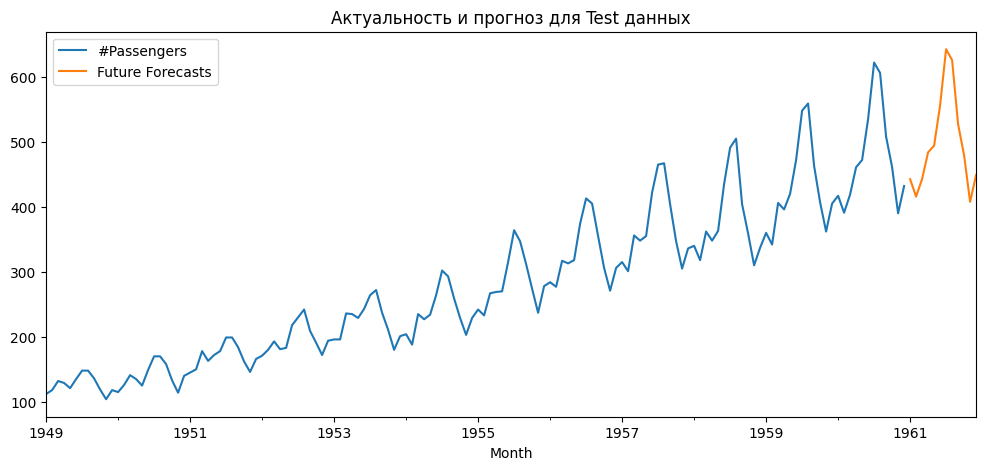

In [102]:
# прогноз
dataset3['#Passengers'].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)